In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(891, 7)


,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [14]:
# replacing Unnamed: 0 column with Id
data['Id'] = data['Unnamed: 0']
data.drop(['Unnamed: 0'], axis=1, inplace=True)

KeyError: 'Unnamed: 0'

In [16]:
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Id
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k,134
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k,743
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k,874
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k,413
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k,635


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
 6   Id                        891 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


# Data Preprocessing

In [18]:
std_enroll = []
for i in range(0, len(data)):
    try:
        num = data['course_students_enrolled'].str.split('k')[i][0]
        num = float(num) * 1000 
        std_enroll.append(num)
    except:
        num = data['course_students_enrolled'].str.split('m')[i][0]
        num = float(num) * 1000000
        std_enroll.append(num)
data['course_students_enrolled'] = std_enroll
data['course_students_enrolled'] = data['course_students_enrolled'].astype(float)

In [19]:
data

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Id
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0,134
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0,743
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0,874
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0,413
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0,635
...,...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52000.0,236
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21000.0,883
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30000.0,545
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9800.0,875


In [20]:
data.describe()

,course_rating,course_students_enrolled,Id
count,891.000000,8.910000e+02,891.000000
mean,4.677329,9.055208e+04,445.000000
std,0.162225,1.819365e+05,257.353842
min,3.300000,1.500000e+03,0.000000
25%,4.600000,1.750000e+04,222.500000
50%,4.700000,4.200000e+04,445.000000
75%,4.800000,9.950000e+04,667.500000
max,5.000000,3.200000e+06,890.000000


## Q1. Which organization has the most number of courses?

In [36]:
def find_org_greater_than_10(data):
    """Returns a dataframe with course_organization and number of courses > 10"""
    dict = {}
    course_org = data['course_organization'].to_list()
    for org in course_org:
        if org in dict:
            dict[org] += 1
        else:
            dict[org] = 1
    orgs = []
    counts = []
    for key, value in dict.items():
        if value > 10:
            orgs.append(key)
            counts.append(value)
        else:
            continue
    course_org_greater_than_1 = pd.DataFrame({'course_organization':orgs, 'count':counts})
    course_org_greater_than_1.sort_values(by='count', ascending=True, inplace=True)
    return course_org_greater_than_1


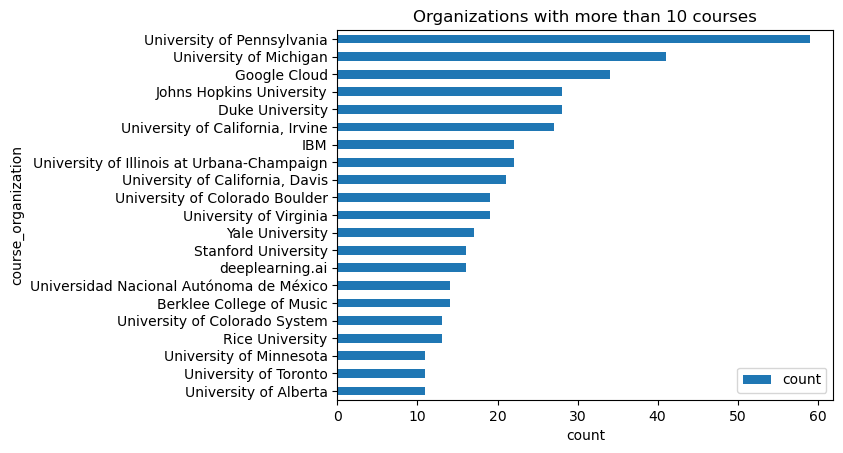

In [37]:
course_org_greater_than_1 = find_org_greater_than_10(data)
# plot a barh chart
course_org_greater_than_1.plot(kind='barh', x='course_organization', y='count')
plt.title('Organizations with more than 10 courses')
plt.xlabel('count')
plt.show()

## Q2. Average course rating of the organizations with more than 10 courses

In [38]:
dom_dict = round(data.groupby('course_organization')['course_rating'].mean(), 1).to_dict()

In [40]:
# Filter out organizations, as we only want those organizations with more than 10 courses
orgs = course_org_greater_than_1['course_organization'].to_list()
avg_rating = []
for org in orgs:
    for key, value in dom_dict.items():
        if key == org:
            avg_rating.append(value)
        else:
            continue
course_org_greater_than_1['avg_rating'] = avg_rating

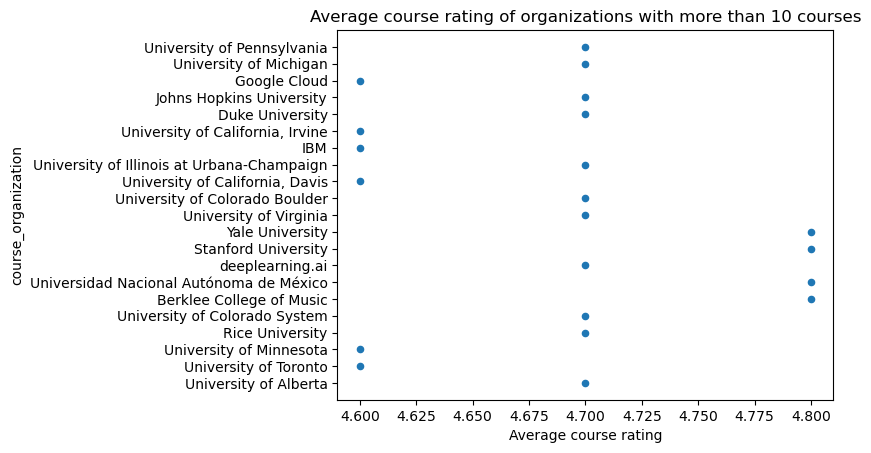

In [66]:
# plot a barh chart
course_org_greater_than_1.plot(kind='scatter', y='course_organization', x='avg_rating')
plt.title('Average course rating of organizations with more than 10 courses')
plt.xlabel('Average course rating')
plt.show()

## Q3. Which organization has the highest course rating?

In [57]:
dom_dict = round(data.groupby('course_organization')['course_rating'].mean(), 1).to_dict()
dom_dict = {k: v for k, v in sorted(dom_dict.items(), key=lambda item: item[1], reverse=True)}
dom_dict

{'Crece con Google': 4.9,
 'Google - Spectrum Sharing': 4.9,
 'Hebrew University of Jerusalem': 4.9,
 'London Business School': 4.9,
 'Nanyang Technological University, Singapore': 4.9,
 'ScrumTrek': 4.9,
 'Universidade Estadual de Campinas': 4.9,
 'Universidade de São Paulo': 4.9,
 'American Museum of Natural History': 4.8,
 'Arizona State University': 4.8,
 'Atlassian': 4.8,
 'Autodesk': 4.8,
 'BCG': 4.8,
 'Berklee College of Music': 4.8,
 'Cloudera': 4.8,
 'Columbia University': 4.8,
 'ESADE Business and Law School': 4.8,
 'Eindhoven University of Technology': 4.8,
 'Institute for the Future': 4.8,
 'Kalshoven-Gieskes Forum': 4.8,
 'Ludwig-Maximilians-Universität München (LMU)': 4.8,
 'Macquarie University': 4.8,
 'McMaster University': 4.8,
 'Osmosis': 4.8,
 'Peking University': 4.8,
 'Relay Graduate School of Education': 4.8,
 'SAS': 4.8,
 'Shanghai Jiao Tong University': 4.8,
 'Stanford University': 4.8,
 'Tel Aviv University': 4.8,
 'The George Washington University': 4.8,
 'The

In [58]:
for key, value in dom_dict.items():
    if value == 4.9:
        print(key)

Crece con Google
Google - Spectrum Sharing
Hebrew University of Jerusalem
London Business School
Nanyang Technological University, Singapore
ScrumTrek
Universidade Estadual de Campinas
Universidade de São Paulo


## Q3. Top 5 courses on Coursera

In [59]:
course_dict = data.groupby('course_title')['course_rating'].mean().to_dict()
course_dict = {k: v for k, v in sorted(course_dict.items(), key=lambda item: item[1], reverse=True)}
course_dict

{'El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho': 5.0,
 'Infectious Disease Modelling': 5.0,
 'Agile и Scrum в работе над проектами и продуктами': 4.9,
 'American Contract Law I': 4.9,
 'Aprendiendo a aprender: Poderosas herramientas mentales con las que podrás dominar temas difíciles (Learning How to Learn)': 4.9,
 'Arizona State University TESOL': 4.9,
 'Aspectos básicos de la planificación y la gestión de proyectos': 4.9,
 'Become a CBRS Certified Professional Installer by Google': 4.9,
 'Boosting Creativity for Innovation': 4.9,
 'Brand Management: Aligning Business, Brand and Behaviour': 4.9,
 'Bugs 101: Insect-Human Interactions': 4.9,
 'Build a Modern Computer from First Principles: From Nand to Tetris (Project-Centered Course)': 4.9,
 'COVID-19 Contact Tracing': 4.9,
 'Compassionate Leadership Through Service Learning with Jane Goodall and Roots & Shoots': 4.9,
 'Convolutional Neural Networks': 4.9,
 'Discrete Optimization': 4.9,
 'Diseño y Creación d

In [61]:
cour_df = pd.DataFrame({'course_title':list(course_dict.keys()), 'course_rating':list(course_dict.values())})
cour_df[:5]

,course_title,course_rating
0,El Abogado del Futuro: Legaltech y la Transfor...,5.0
1,Infectious Disease Modelling,5.0
2,Agile и Scrum в работе над проектами и продуктами,4.9
3,American Contract Law I,4.9
4,Aprendiendo a aprender: Poderosas herramientas...,4.9


## Q4. Does course difficulty affect number of students enrolled?

In [62]:
stud_dict = round(data.groupby('course_difficulty')['course_students_enrolled'].mean(), 0).to_dict()
stud_dict = {k: v for k, v in sorted(stud_dict.items(), key=lambda item: item[1], reverse=True)}
stud_dict

{'Mixed': 133633.0,
 'Beginner': 81975.0,
 'Intermediate': 73264.0,
 'Advanced': 66547.0}

In [63]:
diff_stud = pd.DataFrame({'difficulty':list(stud_dict.keys()), 'avg_students':list(stud_dict.values())})
diff_stud

,difficulty,avg_students
0,Mixed,133633.0
1,Beginner,81975.0
2,Intermediate,73264.0
3,Advanced,66547.0


Text(0, 0.5, 'Number of students')

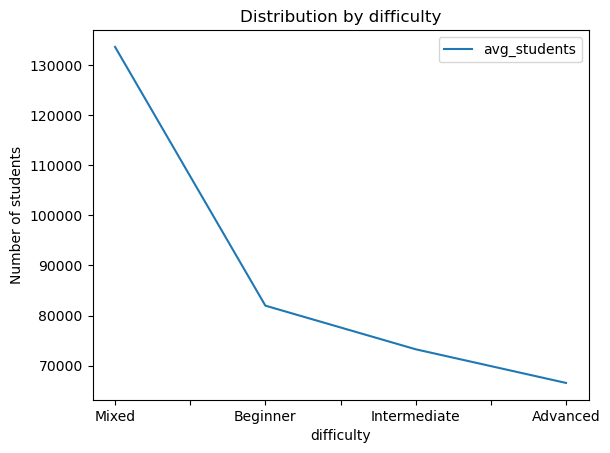

In [70]:
diff_stud.plot(kind='line', x='difficulty', y='avg_students', title='Distribution by difficulty')
plt.ylabel('Number of students')

Well, there are more number of students enrolled per Mixed difficulty level course rather than Beginner.



## Q5. Does course difficulty affect rating?

In [67]:
rate_dict = round(data.groupby('course_difficulty')['course_rating'].mean(), 1).to_dict()
rate_dict = {k: v for k, v in sorted(rate_dict.items(), key=lambda item: item[1], reverse=True)}
rate_dict

{'Beginner': 4.7, 'Mixed': 4.7, 'Advanced': 4.6, 'Intermediate': 4.6}

<Axes: title={'center': 'Average rating by difficulty'}, xlabel='difficulty'>

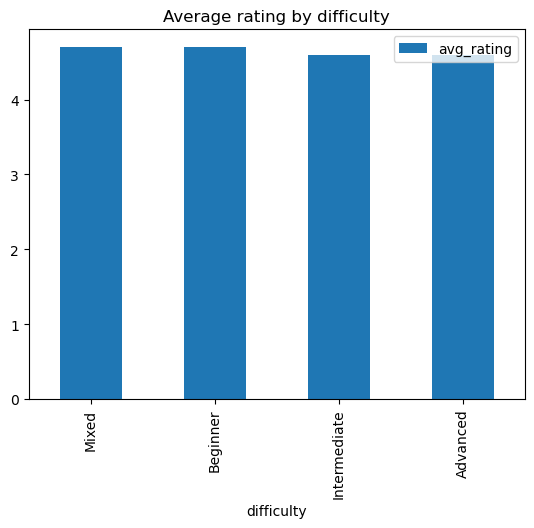

In [74]:
diff_stud['avg_rating'] = list(rate_dict.values())
diff_stud.plot(kind='bar', x='difficulty', y='avg_rating', title='Average rating by difficulty')

Nope, very less difference in the ratings.

## Q6. Does certificate type impact number of students enrolled?

In [78]:
cert_dict = round(data.groupby('course_Certificate_type')['course_students_enrolled'].mean(), 0).to_dict()
cert_dict = {k: v for k, v in sorted(cert_dict.items(), key=lambda item: item[1], reverse=True)}
cert_dict

{'PROFESSIONAL CERTIFICATE': 190700.0,
 'SPECIALIZATION': 91792.0,
 'COURSE': 87854.0}

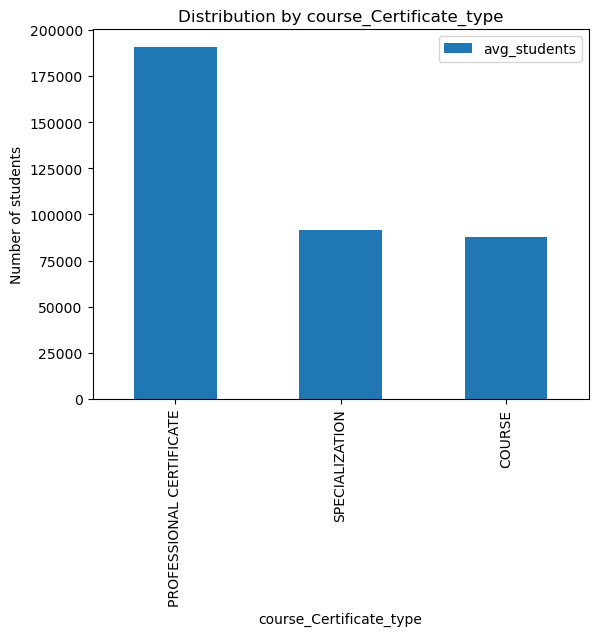

In [79]:
cert_df = pd.DataFrame({'course_Certificate_type':list(cert_dict.keys()), 'avg_students':list(cert_dict.values())})
cert_df.plot(kind='bar', x='course_Certificate_type', y='avg_students', title='Distribution by course_Certificate_type')
plt.ylabel('Number of students')
plt.show()

Yes! More number of students on an average enroll in Professional Certificate courses followed by a specialization.

## Q7. Does certificate type impact course rating?

In [80]:
rate_cert_dict = round(data.groupby('course_Certificate_type')['course_rating'].mean(), 1).to_dict()
rate_cert_dict = {k: v for k, v in sorted(rate_cert_dict.items(), key=lambda item: item[1], reverse=True)}
rate_cert_dict

{'COURSE': 4.7, 'PROFESSIONAL CERTIFICATE': 4.7, 'SPECIALIZATION': 4.6}

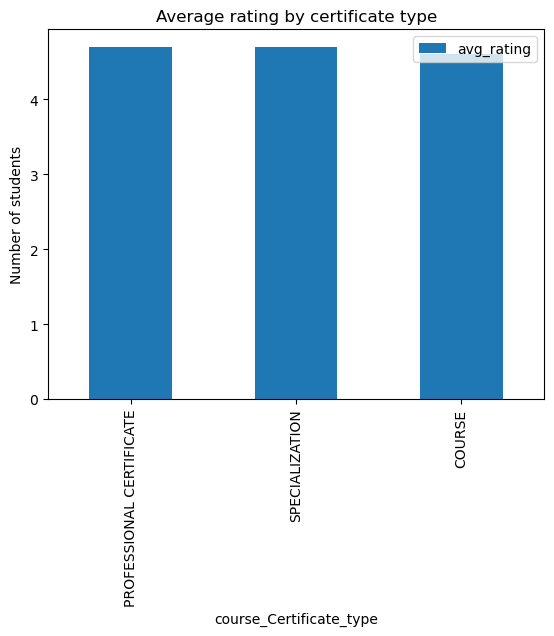

In [81]:
cert_df['avg_rating'] = list(rate_cert_dict.values())
cert_df.plot(kind='bar', x='course_Certificate_type', y='avg_rating', title='Average rating by certificate type')
plt.ylabel('Number of students')
plt.show()

# Conclusion

### University of Pennsylvania has most number of courses on Coursera followed by University of Michigan.
### Organizations with more than 10 courses on Coursera are not present in the top 5 organizations list with highest rating.
### There is no Computer Science course in the top 10 highest rated courses on Coursera. (Please prove me wrong!)
### Course difficulty does affect the number of students enrolled. There are more students enrolled in Beginner and Mixed level of difficulty courses than Intermediate and Advanced.
### Course difficulty does not affect course rating.
### Course certificate type does impact the number of students enrolled in that course. More number of students tend to enroll for Professional Certificate courses than just "COURSE" certificate.
### Certificate type does not impact course rating.